In [21]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as pl

from sklearn.model_selection import cross_validate # for cross validation
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

# Import necessary libraries
from sklearn.svm import SVC
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate
from sklearn.metrics import classification_report

import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate
from sklearn.metrics import classification_report

from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler

import pickle as pck
import joblib

In [22]:
# Leitura dos dados
df = pd.read_csv('trainning.data', delimiter=';')
data = np.array(df.values[: , 2:], dtype = float) 
(N, d) = data.shape
print(N, 'x', d)

120618 x 7


In [23]:
print(len(df.keys()))

9


In [28]:
inputs = data[:, 1:]
output = data[:, 0]
ss = StandardScaler().fit(inputs)
inputs_ss = ss.transform(inputs)


In [29]:
inputs_train, inputs_test, output_train, output_test = train_test_split(inputs,output,test_size = 0.3,shuffle = True)
dic = { 'X_train': inputs_train, 
        'y_train': output_train,
        'X_test': inputs_test,
        'y_test': output_test}

pck.dump(dic, open('dataset_train_test.p', 'wb'))

In [30]:
Dic = pck.load(open('dataset_train_test.p','rb'))
inputs_train    = Dic['X_train']
inputs_test     = Dic['X_test']
output_train = Dic['y_train']
output_test  = Dic['y_test']




[{'criterion': 'gini', 'splitter': 'best'}, {'criterion': 'gini', 'splitter': 'random'}, {'criterion': 'entropy', 'splitter': 'best'}, {'criterion': 'entropy', 'splitter': 'random'}, {'criterion': 'log_loss', 'splitter': 'best'}, {'criterion': 'log_loss', 'splitter': 'random'}]
[0.98764686 0.98543207 0.98786007 0.98666381 0.9880022  0.98633218]
0
1
2
3
4
5
{'best': [np.float64(0.9876468635976696), np.float64(0.9878600691818743), np.float64(0.9880022043676755)], 'random': [np.float64(0.9854320699726612), np.float64(0.9866638140314707), np.float64(0.9863321818638262)]}
Final accuracy score: 0.9883103962858564
[{'priors': None, 'var_smoothing': 1e-09}, {'priors': None, 'var_smoothing': 1e-08}, {'priors': None, 'var_smoothing': 1e-07}, {'priors': None, 'var_smoothing': 1e-06}]
[0.9629643  0.9629643  0.9629643  0.96295246]
0
1
2
3
{None: [np.float64(0.9629643000967455), np.float64(0.9629643000967455), np.float64(0.9629643000967455), np.float64(0.9629524559655126)]}
Final accuracy score: 0.9

/tmp/ipykernel_25514/779387292.py:68: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


[{'algorithm': 'auto', 'n_neighbors': 5}, {'algorithm': 'auto', 'n_neighbors': 10}, {'algorithm': 'auto', 'n_neighbors': 15}, {'algorithm': 'ball_tree', 'n_neighbors': 5}, {'algorithm': 'ball_tree', 'n_neighbors': 10}, {'algorithm': 'ball_tree', 'n_neighbors': 15}, {'algorithm': 'kd_tree', 'n_neighbors': 5}, {'algorithm': 'kd_tree', 'n_neighbors': 10}, {'algorithm': 'kd_tree', 'n_neighbors': 15}, {'algorithm': 'brute', 'n_neighbors': 5}, {'algorithm': 'brute', 'n_neighbors': 10}, {'algorithm': 'brute', 'n_neighbors': 15}]
[0.98562158 0.98254216 0.98245926 0.98562158 0.98254216 0.98245926
 0.98562158 0.98254216 0.98245926 0.98562158 0.98254216 0.98245926]
0
1
2
3
4
5
6
7
8
9
10
11
{'auto': [np.float64(0.9856215753710131), np.float64(0.9825421622701247), np.float64(0.9824592617680021)], 'ball_tree': [np.float64(0.9856215753710131), np.float64(0.9825421622701247), np.float64(0.9824592617680021)], 'kd_tree': [np.float64(0.9856215753710131), np.float64(0.9825421622701247), np.float64(0.9824

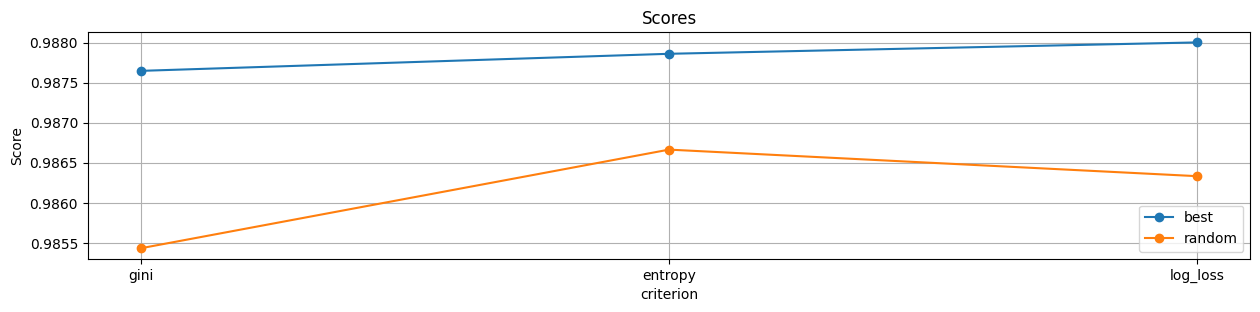

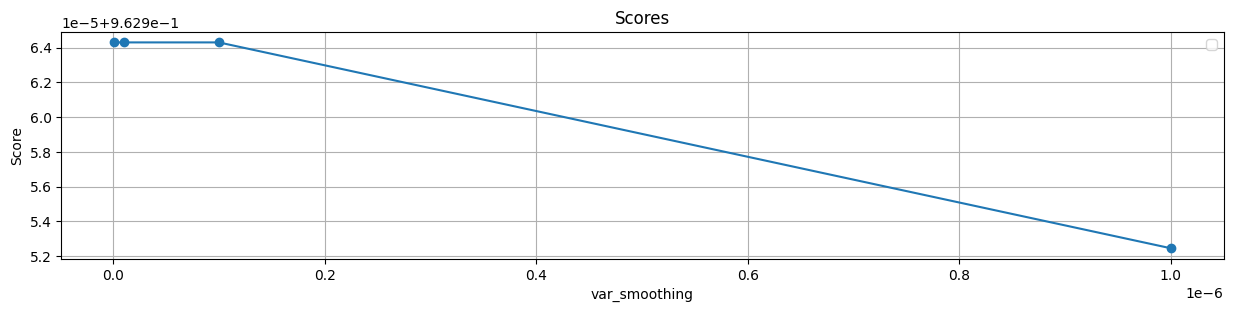

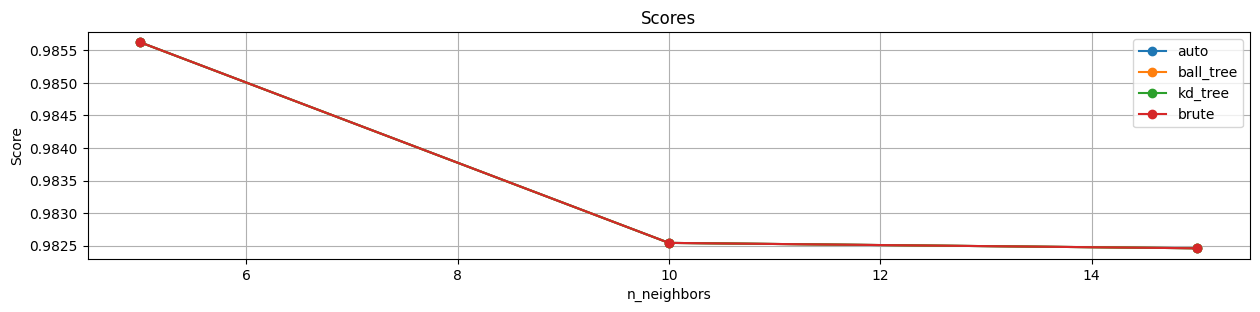

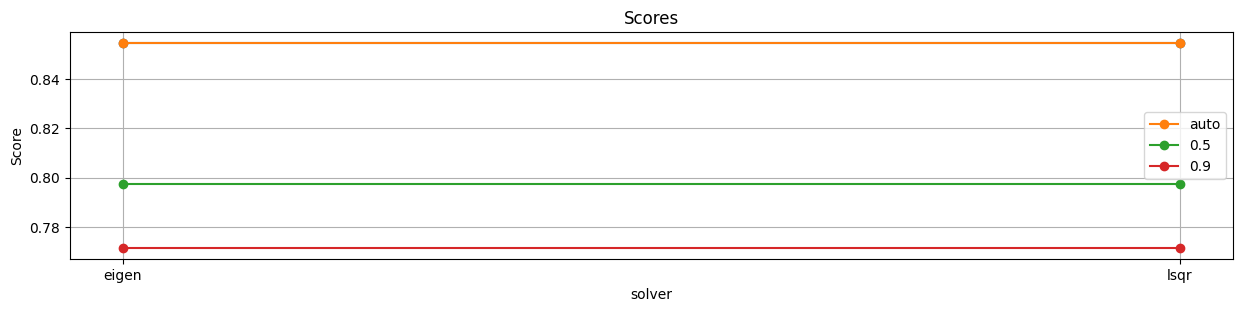

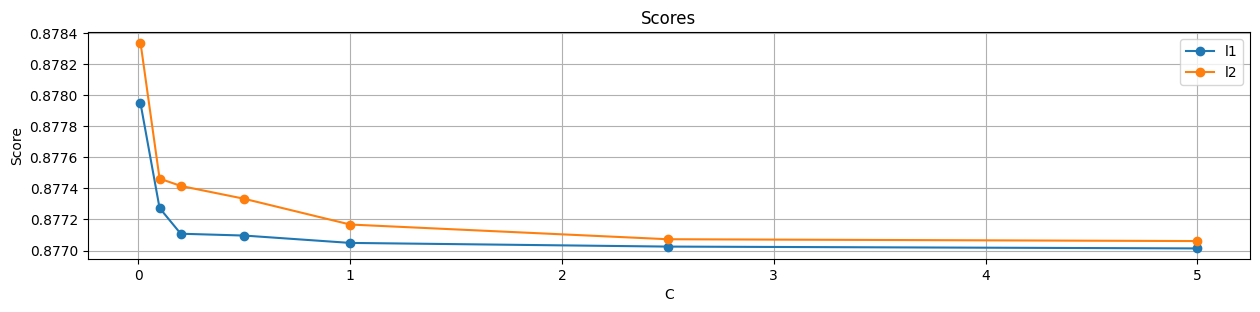

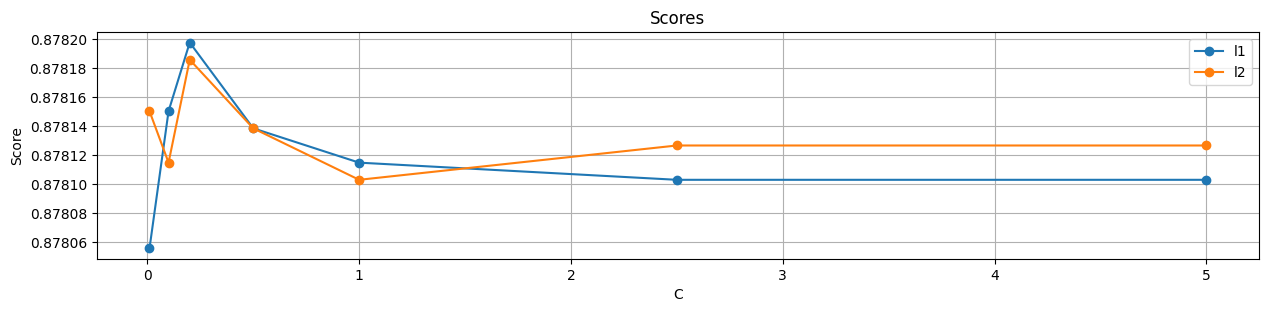

In [39]:
# Lista de modelos e parâmetros
models_and_params = {
    "iDT": (
        DecisionTreeClassifier(),
        {"criterion":["gini", "entropy", "log_loss"], "splitter":["best", "random"]},
    ),
    "GNB": (
        GaussianNB(),
        {"var_smoothing": [1e-9, 1e-8, 1e-7, 1e-6],"priors": [None]},
    ),
    "KNN": (
        KNeighborsClassifier(),
        {"n_neighbors": [5, 10, 15], "algorithm":["auto", "ball_tree", "kd_tree", "brute"]},
    ),
    "LDA": (
        LinearDiscriminantAnalysis(),
        {"solver": ["eigen", "lsqr"], "shrinkage": [None, "auto", 0.5,0.9]},
    ),
    "LR": (
        LogisticRegression(solver="saga"),
        {"C": [0.01, 0.1, 0.2 ,0.5, 1, 2.5, 5], "penalty": ['l1', 'l2']},
    ),
    "LinearSVC": (
        LinearSVC(),
        {"C": [0.01, 0.1, 0.2 ,0.5, 1, 2.5, 5], "penalty": ['l1', 'l2']},)

}

for model_name, (model, param_grid) in models_and_params.items():
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring=["accuracy"], refit="accuracy")

    grid_search.fit(inputs_train, output_train)

    results = grid_search.cv_results_
    
    print(results['params'])
    print(results['mean_test_accuracy'])

    param_1, param_2 = list(param_grid.keys())[0],list(param_grid.keys())[1]

    
    
    
    aux_C = param_grid[param_1]
    
    
    
    aux_score = {}
    
    for i in param_grid[param_2]:
        aux_score[i] = []
    
    for x in range(len(results['params'])): 
        print(x)
        aux_score[results['params'][x][param_2]].append(results['mean_test_accuracy'][x])
        
    print(aux_score)
            
    
            
    plt.figure(figsize=(15,10))
    plt.subplot(3,1,1)
    for x2 in list(aux_score.keys()):
        plt.plot(aux_C, aux_score[x2],  '-o', label=x2)
    plt.xlabel(param_1)
    plt.ylabel("Score")
    plt.title("Scores")
    plt.legend()
    plt.grid() 
    plt.savefig(fname="model_gridsearch_"+model_name+".png")   

    ye_test = grid_search.best_estimator_.predict(inputs_test)
    
    print("Final accuracy score: " + str(accuracy_score(output_test, ye_test)))

    clf = grid_search.best_estimator_
    clf.fit(inputs_ss, output)
    # Save the model
    joblib.dump(clf, "model_"+model_name+".dat.gz", compress=("gzip", 3))
    
    

    
